This example file shows the process of typicle built-in strategy optimizaiton: 
- creating an operator object with built-in strategies
- set up context object for optimization settings
- find out and back-test optimal result based on historical data

In [1]:
import sys
sys.path.append('../')
import qteasy as qt
import numpy as np
import pandas as pd
%matplotlib inline

Module qteasy has been loaded successfully!, version: 0.1
pandas version: 0.25.1
numpy version: 1.17.2
tushare version: 1.2.48


In [2]:
cont = qt.Context(moq=0)
cont.reference_asset = '000300.SH'
cont.reference_asset_type = 'I'
cont.share_pool = '000300.SH'
cont.asset_type = 'I'
cont.output_count = 30
cont.invest_start = '20020101'
cont.parallel = True
cont.print_log = True
cont.moq = 0
cont.rate = qt.Cost(buy_fix=0.0, buy_rate=0.0015, buy_min=0.0,
                 sell_fix=0.0, sell_rate=0.0, sell_min=0.0,
                 slipage=0.0)

In [3]:
op = qt.Operator(timing_types=['dma'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=1, par_boes=[(10, 250), (10, 250), (10, 250)])
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'none')

op.set_parameter(stg_id='t-0', pars=(96, 111, 64))
op.set_parameter('r-0', pars=(8, -0.1443033))
# cont.mode = 1
# run(op, cont)

print(f'============SEARCHING FOR DMA PARAMS==============\n'
      f'==================================================')
cont.mode = 2
cont.opti_method = 1
cont.opti_method_sample_size = 100
cont.opti_method_step_size = 32
cont.opti_method_init_step_size = 16
cont.opti_method_min_step_size = 1
cont.opti_method_incre_ratio = 2
perfs_dma, pars_dma = qt.run(op, cont)

============SEARCHING FOR DMA PARAMS==============
Getting price type historical data...
Getting price type historical data...
       RUNNING IN MODE 2
      --Optimization Mode--



../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  

Optimization progress: [########################################] 100/100. 100.0%  best performance: 82542.761
Optimization completed, total time consumption: 7"789

==========SEARCHING FINISHED===============
Searching finished, 30 best results are generated
The best parameter performs 4.841 times better than the least performing result
best result: 82542.761 obtained at parameter: 
(95, 137, 52)
least result: 17052.461 obtained at parameter: 
(26, 43, 68)
complete list of performance and parameters are following, 
                            0
(26, 43, 68)     17052.461429
(49, 56, 14)     17499.653714
(16, 80, 45)     17952.188637
(225, 198, 43)   18195.372733
(122, 39, 56)    19616.409995
(81, 33, 132)    19734.715882
(17, 75, 78)     20538.307169
(68, 19, 138)    21368.970917
(55, 23, 194)    23000.232983
(76, 97, 140)    24755.007699
(11, 20, 15)     25561.061568
(54, 157, 11)    27341.046700
(43, 156, 98)    28578.601142
(31, 40, 130)    28657.632473
(54, 160, 77)    29543.17891

In [4]:
# find out best performers for strategy macd

print(f'==================SEARCHING FOR MACD PARAMS===================\n'
      f'==============================================================')
op = qt.Operator(timing_types=['macd'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=1, par_boes=[(10, 250), (10, 250), (10, 250)])
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'none')
op.set_parameter(stg_id='t-0', pars=(96, 111, 64))
op.set_parameter('r-0', pars=(8, -0.1443033))

cont.mode = 2
perfs_macd, pars_macd = qt.run(op, cont)

# find out best performers for strategy trix
print(f'==================SEARCHING FOR TRIX PARAMS===================\n'
      f'==============================================================')
op = qt.Operator(timing_types=['trix'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=1, par_boes=[(5, 50), (10, 150)])
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'none')
op.set_parameter(stg_id='t-0', pars=(50, 34))
op.set_parameter('r-0', pars=(8, -0.1443033))

cont.mode = 2
cont.opti_method_sample_size = 100
perfs_trix, pars_trix = qt.run(op, cont)

# find out best performers for strategy crossline
print(f'===============SEARCHING FOR CROSSLINE PARAMS=================\n'
      f'==============================================================')
op = qt.Operator(timing_types=['crossline'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=1, par_boes=[(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')])
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'none')
op.set_parameter(stg_id='t-0', pars=(97, 124, 3.8286731572085966, 'buy'))
op.set_parameter('r-0', pars=(8, -0.1443033))

cont.mode = 2
perfs_cl, pars_cl = qt.run(op, cont)

# find out best performance with all four strategies combined:

==================SEARCHING FOR MACD PARAMS===================
Getting price type historical data...
Getting price type historical data...
       RUNNING IN MODE 2
      --Optimization Mode--



../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  

Optimization progress: [########--------------------------------] 20/100. 20.0%  best performance: 52282.622

../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)


Optimization progress: [########################################] 100/100. 100.0%  best performance: 52282.622
Optimization completed, total time consumption: 6"754

==========SEARCHING FINISHED===============
Searching finished, 30 best results are generated
The best parameter performs 3.656 times better than the least performing result
best result: 52282.622 obtained at parameter: 
(67, 162, 105)
least result: 14302.078 obtained at parameter: 
(213, 24, 44)
complete list of performance and parameters are following, 
                            0
(213, 24, 44)    14302.078308
(110, 66, 158)   14325.872228
(166, 54, 61)    14443.282905
(131, 98, 96)    14609.479685
(142, 111, 120)  15193.891621
(65, 15, 138)    15273.974137
(62, 40, 112)    18305.810341
(90, 17, 46)     19304.095431
(230, 76, 20)    20940.207616
(49, 89, 15)     21237.402683
(149, 39, 44)    22469.225205
(16, 85, 70)     22911.037198
(34, 38, 47)     27286.335471
(56, 205, 16)    27794.314199
(38, 229, 12)    31763.858

../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide

Optimization progress: [########################################] 100/100. 100.0%  best performance: 50459.789
Optimization completed, total time consumption: 6"439

==========SEARCHING FINISHED===============
Searching finished, 30 best results are generated
The best parameter performs 1.443 times better than the least performing result
best result: 50459.789 obtained at parameter: 
(29, 102)
least result: 34978.442 obtained at parameter: 
(40, 52)
complete list of performance and parameters are following, 
                      0
(40, 52)   34978.442189
(29, 143)  35024.091096
(38, 71)   35208.200556
(22, 116)  35348.104606
(10, 34)   37102.258498
(39, 57)   37459.833016
(33, 113)  37686.199004
(10, 37)   37774.991578
(33, 128)  38101.481610
(37, 147)  38378.528791
(35, 108)  38394.108430
(9, 30)    38457.827035
(49, 22)   38604.258439
(39, 60)   38842.717650
(46, 26)   39127.256870
(41, 143)  40867.674765
(41, 115)  41805.396563
(50, 26)   42301.420121
(42, 135)  42729.714577
(44, 1

../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide

Optimization progress: [########################################] 100/100. 100.0%  best performance: 32396.794
Optimization completed, total time consumption: 5"440

==========SEARCHING FINISHED===============
Searching finished, 30 best results are generated
The best parameter performs 1.267 times better than the least performing result
best result: 32396.794 obtained at parameter: 
(99, 110, 1.2677810920352905, 'none')
least result: 25568.301 obtained at parameter: 
(47, 220, 2.5749055066751145, 'none')
complete list of performance and parameters are following, 
                                                 0
(47, 220, 2.5749055066751145, none)   25568.300726
(33, 248, 5.612552168969303, none)    25735.482374
(136, 244, 0.16053578044235906, buy)  25845.078518
(89, 139, 2.527964807858547, sell)    25951.147078
(132, 224, 7.701658886847466, sell)   26115.072418
(43, 245, 5.6605869755410065, none)   26422.354556
(92, 248, 8.857250161795259, sell)    26453.662563
(120, 225, 1.99938588

===============SEARCHING FOR COMBINED PARAMS==================
parameter enums:
dma: 
[(26, 43, 68), (49, 56, 14), (16, 80, 45), (225, 198, 43), (122, 39, 56), (81, 33, 132), (17, 75, 78), (68, 19, 138), (55, 23, 194), (76, 97, 140), (11, 20, 15), (54, 157, 11), (43, 156, 98), (31, 40, 130), (54, 160, 77), (41, 25, 87), (86, 145, 16), (74, 127, 31), (156, 218, 22), (107, 199, 45), (76, 88, 92), (63, 130, 111), (112, 206, 17), (167, 176, 71), (100, 122, 109), (98, 126, 102), (133, 185, 75), (180, 207, 25), (92, 121, 101), (95, 137, 52)]
macd:
[(213, 24, 44), (110, 66, 158), (166, 54, 61), (131, 98, 96), (142, 111, 120), (65, 15, 138), (62, 40, 112), (90, 17, 46), (230, 76, 20), (49, 89, 15), (149, 39, 44), (16, 85, 70), (34, 38, 47), (56, 205, 16), (38, 229, 12), (12, 210, 57), (49, 51, 95), (26, 82, 110), (85, 101, 123), (44, 160, 100), (187, 189, 53), (38, 72, 153), (74, 195, 31), (73, 81, 175), (79, 133, 103), (76, 99, 89), (75, 191, 50), (101, 158, 98), (161, 176, 67), (67, 162, 105

以本期资产价格[2744.68]买入资产 [2.64]
实际花费现金 -7260.03 并产生交易费用: 10.87
期末现金: 14211.19, 期末总资产: 29029.26

交易日期:2011/11/28
考虑现金增值, 上期现金: 14211.19, 经过13天后现金增值到14233.36
本期期初总资产: 28126.29，其中包括: 
期初现金: 14233.36, 
期初持有资产: [5.4]
且资产价格为: [2573.32]
本期交易信号[-0.5]
以本期资产价格[2573.32]出售资产 [2.7]
获得现金:6946.47, 产生交易费用 0.00, 交易后现金余额: 21179.82269335896
本期计划买入资产动用资金: 0.00
以本期资产价格[2573.32]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 21179.82, 期末总资产: 28126.29

交易日期:2011/12/16
考虑现金增值, 上期现金: 21179.82, 经过18天后现金增值到21225.57
本期期初总资产: 27677.53，其中包括: 
期初现金: 21225.57, 
期初持有资产: [2.7]
且资产价格为: [2390.13]
本期交易信号[-1.]
以本期资产价格[2390.13]出售资产 [2.7]
获得现金:6451.95, 产生交易费用 0.00, 交易后现金余额: 27677.525084237917
本期计划买入资产动用资金: 0.00
以本期资产价格[2390.13]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 27677.53, 期末总资产: 27677.53

交易日期:2012/02/02
考虑现金增值, 上期现金: 27677.53, 经过48天后现金增值到27836.95
本期期初总资产: 27836.95，其中包括: 
期初现金: 27836.95, 
期初持有资产: [0.]
且资产价格为: [2486.24]
本期交易信号[0.25]
以本期资产价格[2486.24]出售资产 [-0.]
获得现金:0.00, 产生交易费用 0.00, 交易后现金余额: 27836.947628723126
本期计划买入资产动用资金: 695

以本期资产价格[3205.64]出售资产 [0.]
获得现金:0.00, 产生交易费用 0.00, 交易后现金余额: 59324.08751485668
本期计划买入资产动用资金: 0.00
以本期资产价格[3205.64]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 59324.09, 期末总资产: 59324.09

交易日期:2015/08/28
考虑现金增值, 上期现金: 59324.09, 经过1天后现金增值到59331.21
本期期初总资产: 59331.21，其中包括: 
期初现金: 59331.21, 
期初持有资产: [0.]
且资产价格为: [3342.29]
本期交易信号[-1.]
以本期资产价格[3342.29]出售资产 [0.]
获得现金:0.00, 产生交易费用 0.00, 交易后现金余额: 59331.206405358455
本期计划买入资产动用资金: 0.00
以本期资产价格[3342.29]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 59331.21, 期末总资产: 59331.21

交易日期:2015/08/31
考虑现金增值, 上期现金: 59331.21, 经过3天后现金增值到59352.57
本期期初总资产: 59352.57，其中包括: 
期初现金: 59352.57, 
期初持有资产: [0.]
且资产价格为: [3366.54]
本期交易信号[-1.]
以本期资产价格[3366.54]出售资产 [0.]
获得现金:0.00, 产生交易费用 0.00, 交易后现金余额: 59352.565639664375
本期计划买入资产动用资金: 0.00
以本期资产价格[3366.54]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 59352.57, 期末总资产: 59352.57

交易日期:2015/09/02
考虑现金增值, 上期现金: 59352.57, 经过2天后现金增值到59366.81
本期期初总资产: 59366.81，其中包括: 
期初现金: 59366.81, 
期初持有资产: [0.]
且资产价格为: [3365.83]
本期交易信号[-1.]
以本期资产价格[3365.83]出售资产

本期期初总资产: 67734.37，其中包括: 
期初现金: 34023.64, 
期初持有资产: [8.32]
且资产价格为: [4050.09]
本期交易信号[-0.5]
以本期资产价格[4050.09]出售资产 [4.16]
获得现金:16855.37, 产生交易费用 0.00, 交易后现金余额: 50879.00623155858
本期计划买入资产动用资金: 0.00
以本期资产价格[4050.09]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 50879.01, 期末总资产: 67734.37

交易日期:2017/12/18
考虑现金增值, 上期现金: 50879.01, 经过5天后现金增值到50909.53
本期期初总资产: 67495.22，其中包括: 
期初现金: 50909.53, 
期初持有资产: [4.16]
且资产价格为: [3985.29]
本期交易信号[-1.]
以本期资产价格[3985.29]出售资产 [4.16]
获得现金:16585.68, 产生交易费用 0.00, 交易后现金余额: 67495.21699692888
本期计划买入资产动用资金: 0.00
以本期资产价格[3985.29]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 67495.22, 期末总资产: 67495.22

交易日期:2018/01/10
考虑现金增值, 上期现金: 67495.22, 经过23天后现金增值到67681.50
本期期初总资产: 67681.50，其中包括: 
期初现金: 67681.50, 
期初持有资产: [0.]
且资产价格为: [4207.81]
本期交易信号[0.25]
以本期资产价格[4207.81]出售资产 [-0.]
获得现金:0.00, 产生交易费用 0.00, 交易后现金余额: 67681.50379584041
本期计划买入资产动用资金: 16920.38
以本期资产价格[4207.81]买入资产 [4.02]
实际花费现金 -16920.38 并产生交易费用: 25.34
期末现金: 50761.13, 期末总资产: 67656.16

交易日期:2018/01/11
考虑现金增值, 上期现金: 50761.13, 经过1天后现金增值到

yearly return is: 
80018.14903443307 / 10000 = 
0.16355797438145858
volatility is:  
0.1294239210963368
|                                  |
|          LOOPING RESULT          |
|                                  |

qteasy running mode: 1 - History back looping
time consumption for operate signal creation: 226.3ms ms
time consumption for operation back looping: 1s 133.1ms ms

investment starts on 2007-01-11 00:00:00
ends on 2020-09-30 00:00:00
Total looped periods: 13.7 years.
operation summary:
            sell  buy  total
000300.SH    51   51    102
Total operation fee:     ¥   1,526.12
total investment amount: ¥  10,000.00
final value:             ¥  80,018.15
Total return: 800.181% 
Average Yearly return rate:  16.393%
Total reference return: 105.563% 
Average Yearly reference return rate: 5.389%
strategy performance indicators: 
alpha:               0.102
Beta:                1.417
Sharp ratio:         0.993
Info ratio:          0.008
250 day volatility:  0.130
Max drawdown:      

0.9933092220700558

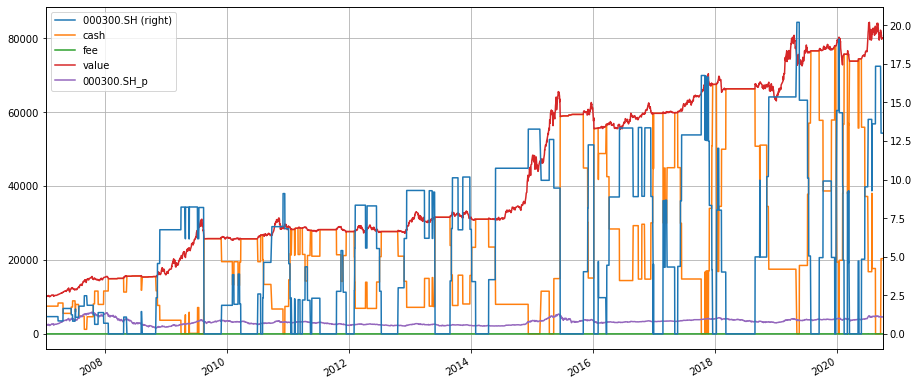

In [6]:
print(f'===============SEARCHING FOR COMBINED PARAMS==================\n'
      f'==============================================================\n'
      f'parameter enums:\n'
      f'dma: \n{pars_dma}\n'
      f'macd:\n{pars_macd}')
op = qt.Operator(timing_types=['dma', 'macd', 'trix', 'crossline'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=2, par_boes=pars_dma, par_types='enum')
op.set_parameter('t-1', opt_tag=2, par_boes=pars_macd, par_types='enum')
op.set_parameter('t-2', opt_tag=2, par_boes=pars_trix, par_types='enum')
op.set_parameter('t-3', opt_tag=2, par_boes=pars_cl, par_types='enum')
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'avg')
op.set_parameter(stg_id='t-0', pars=(96,111,64))
op.set_parameter(stg_id='t-1', pars=(157,188,20))
op.set_parameter(stg_id='t-2', pars=(28, 95))
op.set_parameter(stg_id='t-3', pars=(105, 109, 9.99, 'buy'))
op.set_parameter('r-0', pars=(8, -0.1443033))
print(f'=========================================\n'
      f'op object\'s opt space par is: {op.opt_space_par}\n'
      f'op object\'s par boes and par types are:\n')

cont.mode = 1
cont.opti_method = 1
cont.opti_method_sample_size = 100
cont.opti_method_step_size = 1
qt.run(op, cont)